In [ ]:
import pandas as pd
import numpy as np
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")

# Отображение графика

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Преобразование столбца с датами в формат datetime
sales_of_company_x['Month'] = pd.to_datetime(sales_of_company_x['Month'])
# Установка столбца с датами в качестве индекса
sales_of_company_x.set_index('Month', inplace=True)

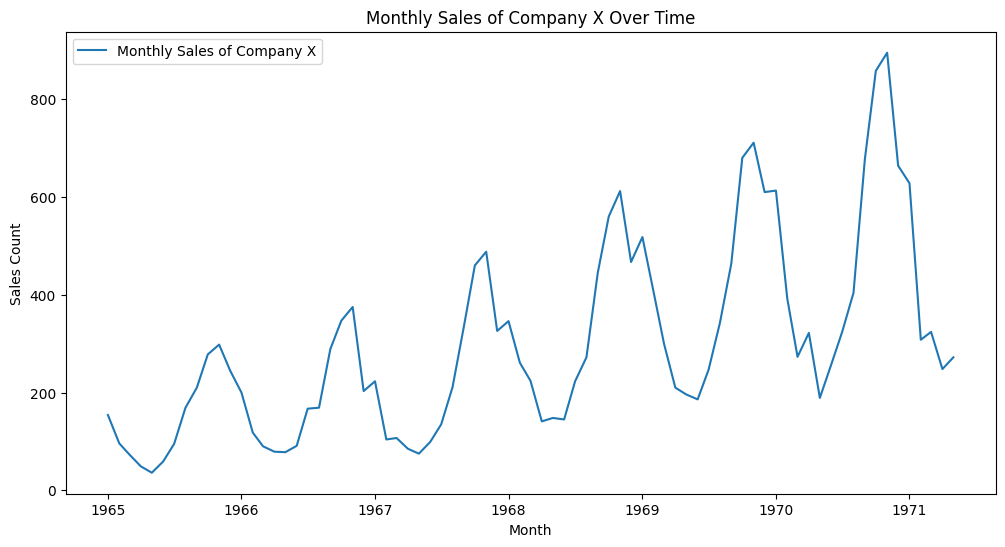

In [ ]:
# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(sales_of_company_x.index, sales_of_company_x['Count'], label='Monthly Sales of Company X')
plt.title('Monthly Sales of Company X Over Time')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend()
plt.show()

Построение модели ARIMA

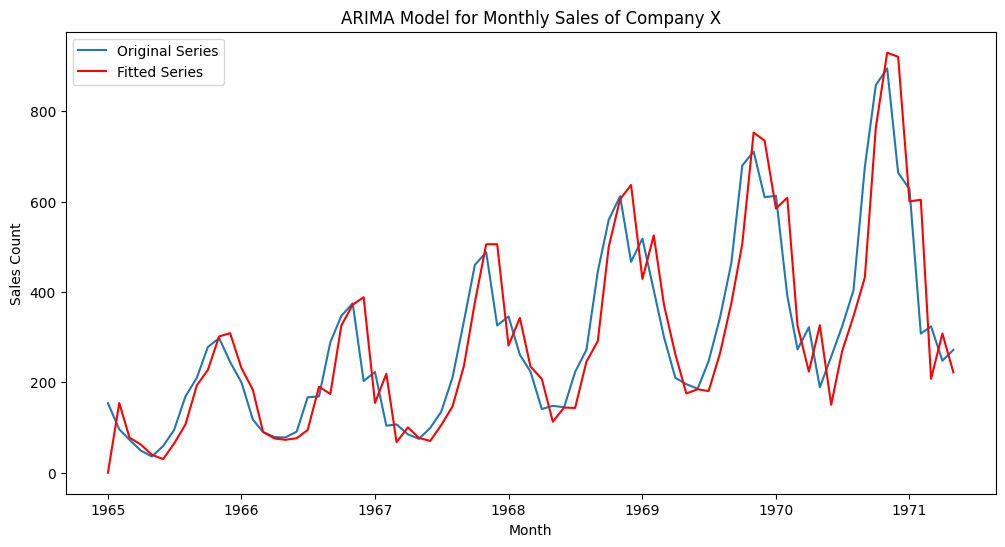

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Построение модели ARIMA
model = ARIMA(sales_of_company_x['Count'], order=(1, 1, 1))  # Пример параметров (p, d, q)
results = model.fit()

# Визуализация оригинального и предсказанного рядов
plt.figure(figsize=(12, 6))
plt.plot(sales_of_company_x.index, sales_of_company_x['Count'], label='Original Series')
plt.plot(sales_of_company_x.index, results.fittedvalues, color='red', label='Fitted Series')
plt.title('ARIMA Model for Monthly Sales of Company X')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend()
plt.show()

Найдем оптимальные параметры модели

In [ ]:
import itertools
import statsmodels.api as sm
series = sales_of_company_x
# Определение диапазонов для параметров p, d, q
p = d = q = range(0, 4)

# Генерация всех комбинаций параметров
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_params = None

# Проход по всем комбинациям параметров
for params in pdq:
    try:
        model = sm.tsa.ARIMA(series, order=params)
        results = model.fit()
        aic = results.aic

        # Сравнение с текущим лучшим AIC
        if aic < best_aic:
            best_aic = aic
            best_params = params
    except Exception as e:
        print(f"Error for {params}: {e}")
        continue

print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")

Best AIC: 858.2062752305067
Best Parameters: (3, 1, 2)


Построение модели ARIMA  с оптимальными параметрами

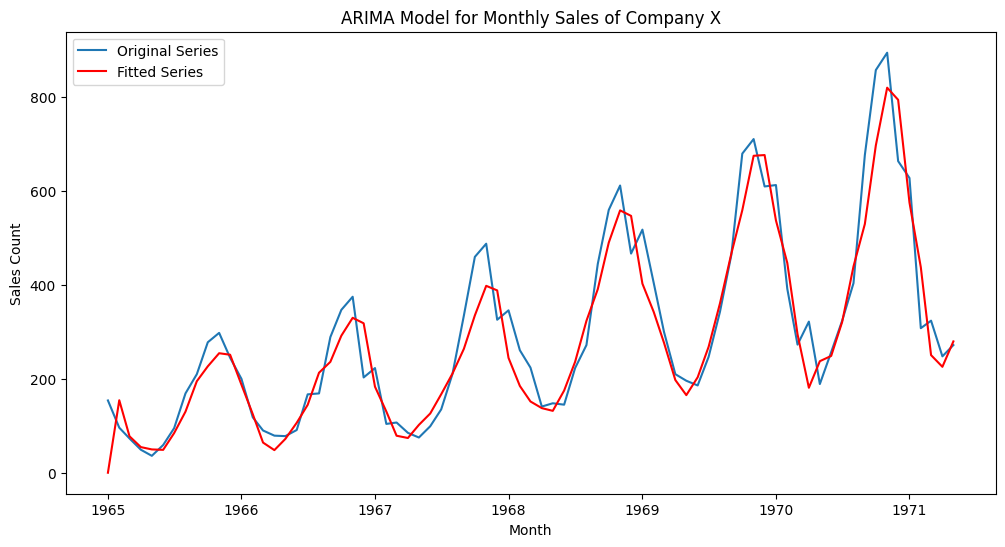

In [ ]:
# Построение модели ARIMA
model = ARIMA(sales_of_company_x['Count'], order=(3, 1, 2))  # Пример параметров (p, d, q)
results = model.fit()

# Визуализация оригинального и предсказанного рядов
plt.figure(figsize=(12, 6))
plt.plot(sales_of_company_x.index, sales_of_company_x['Count'], label='Original Series')
plt.plot(sales_of_company_x.index, results.fittedvalues, color='red', label='Fitted Series')
plt.title('ARIMA Model for Monthly Sales of Company X')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend()
plt.show()

Построение прогнозного тренда на 12 месяцев

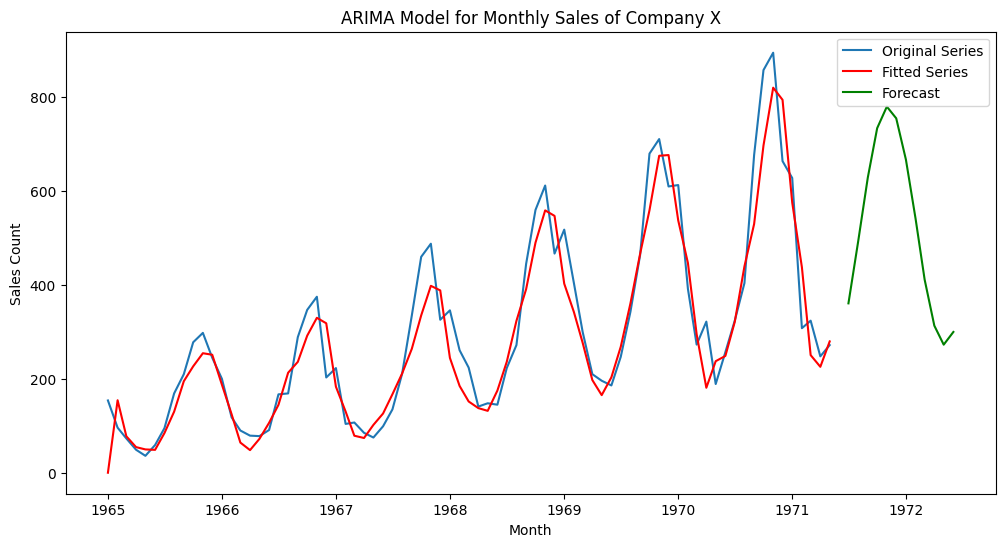

In [ ]:
# Прогноз на 12 периодов вперед
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)

# Создание временного ряда для прогноза
forecast_index = pd.date_range(start=sales_of_company_x.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Визуализация оригинального, предсказанного ряда и прогноза
plt.figure(figsize=(12, 6))
plt.plot(sales_of_company_x.index, sales_of_company_x['Count'], label='Original Series')
plt.plot(sales_of_company_x.index, results.fittedvalues, color='red', label='Fitted Series')
plt.plot(forecast_index, forecast.predicted_mean, color='green', label='Forecast')

# Добавление подписей
plt.title('ARIMA Model for Monthly Sales of Company X')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Применим в качестве прогнозного инструмента модель RandomForest

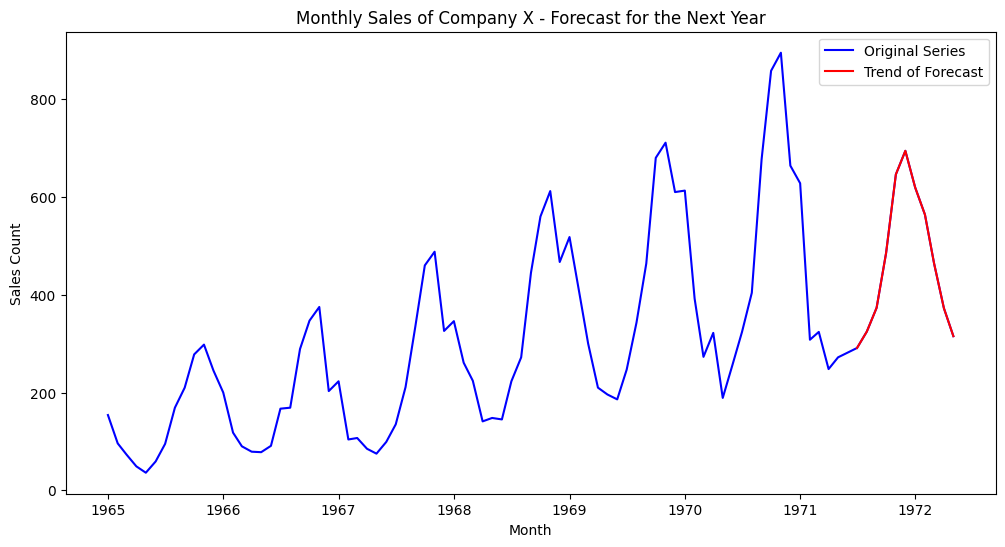

In [ ]:
# Создание признаков для классического ML
sales_of_company_x['Year'] = sales_of_company_x.index.year
sales_of_company_x['Month'] = sales_of_company_x.index.month

# Разделение на обучающий и тестовый наборы
train_size = int(len(sales_of_company_x) * 0.8)
train, test = sales_of_company_x[:train_size], sales_of_company_x[train_size:]

# Выбор признаков и целевой переменной
features = ['Year', 'Month']  # Добавьте другие признаки при необходимости
target = 'Count'

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Создание будущих дат
future_dates = pd.date_range(start=sales_of_company_x.index[-1], periods=12, freq='M')[1:]

# Создание признаков для будущих дат
future_features = pd.DataFrame({'Year': future_dates.year, 'Month': future_dates.month}, index=future_dates)

# Прогнозирование
future_predictions = model.predict(future_features)

# Добавление прогнозов в исходный DataFrame
sales_of_company_x_forecast = sales_of_company_x.copy()
sales_of_company_x_forecast = sales_of_company_x_forecast.append(pd.DataFrame(future_predictions, index=future_dates, columns=['Count']))

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(sales_of_company_x_forecast.index, sales_of_company_x_forecast['Count'], label='Original Series', color='blue')
plt.plot(future_dates, future_predictions, label='Trend of Forecast', color='red')
plt.title('Monthly Sales of Company X - Forecast for the Next Year')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend()
plt.show()